In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_dir =r'D:\santosh\Deep Learning\Data set-2\train'
validation_dir =r'D:\santosh\Deep Learning\Data set-2\validation'
test_dir = r'D:\santosh\Deep Learning\Data set-2\test'

# Data Preprocessing

* Read the pictre files
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating point tensors
* Rescale the pixel values (between 0 and 255)to the [0,1] interval

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Generating batches of tensor image data

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
           train_dir,
           target_size = (150,150),
           batch_size = 20,
           class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
           validation_dir,
           target_size = (150,150),
           batch_size = 20,
           class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers 
from tensorflow.keras import models

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation= 'relu'))

model.add(layers.Dense(1,activation = 'sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow .keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=1e-4),
             metrics= ['acc'])

In [11]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch = 100,
          epochs = 20,
          validation_data = validation_generator,
          validation_steps = 50)

C:\Users\LEGION\anaconda3\envs\santosh\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 56s 549ms/step - loss: 0.6897 - acc: 0.5400 - val_loss: 0.6757 - val_acc: 0.6020
Epoch 2/20
100/100 [==============================] - 48s 479ms/step - loss: 0.6577 - acc: 0.6235 - val_loss: 0.6531 - val_acc: 0.6010
Epoch 3/20
100/100 [==============================] - 49s 488ms/step - loss: 0.6113 - acc: 0.6680 - val_loss: 0.6127 - val_acc: 0.6460
Epoch 4/20
100/100 [==============================] - 47s 473ms/step - loss: 0.5671 - acc: 0.7045 - val_loss: 0.6243 - val_acc: 0.6570
Epoch 5/20
100/100 [==============================] - 45s 452ms/step - loss: 0.5350 - acc: 0.7310 - val_loss: 0.5833 - val_acc: 0.6910
Epoch 6/20
100/100 [==============================] - 45s 449ms/step - loss: 0.5089 - acc: 0.7510 - val_loss: 0.5576 - val_acc: 0.7170
Epoch 7/20
100/100 [==============================] - 47s 468ms/step - loss: 0.4808 - acc: 0.7790 - val_loss: 0.5627 - val_acc: 0.7020
Epoch 8/20
100/100 [==============================] - 4

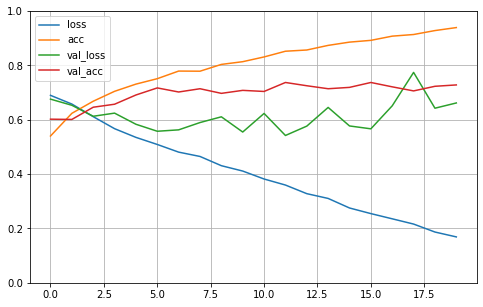

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
 model.save("model.h5")

In [14]:
from tensorflow.keras import backend as k

k.clear_session()
del model